<a href="https://colab.research.google.com/github/dqj5182/whoisinmyphoto/blob/main/Face_Recognition_Name_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flask: Python-based Web Development


In [ ]:
# Connecting and Mounting to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install required packages
**Under python backend: model.py**

In [ ]:
!pip install -q face_recognition
!pip install -q fer
!pip install facenet-pytorch

     |████████████████████████████████| 100.1 MB 9.7 kB/s 
     |████████████████████████████████| 810 kB 1.1 MB/s 
     |████████████████████████████████| 2.3 MB 39.6 MB/s 
     |████████████████████████████████| 1.9 MB 1.1 MB/s 


# Packages Imported
**Under python backend: model.py**

In [ ]:
# Packages
from facenet_pytorch import MTCNN, InceptionResnetV1
import face_recognition
from torchvision import datasets
import torch
import numpy as np
from PIL import Image, ImageDraw
import PIL.Image
from io import BytesIO
import operator
import time
import torch.nn.functional as F
import os

# Face recognition models
**Under python backend: model.py**

In [ ]:
# Initialization (we are using pre-trained face recognition model)
mtcnn = MTCNN()
resnet = InceptionResnetV1(pretrained='vggface2').eval()
resnet.classify = True

  0%|          | 0.00/107M [00:00<?, ?B/s]

# Function that gives embedding list from image list
**Under python backend: model.py**

In [ ]:
# Get Embedding
def get_embedding_list(image_list_input):
    embeddinglist = []
    for images in image_list_input:
        im = PIL.Image.open(images)
        im_cropped = mtcnn(im)
        im_embedding = resnet(im_cropped.unsqueeze(0))
        embeddinglist.append(im_embedding) # Important part: making baseembeddinglist
    return embeddinglist

# Function that gives prediction list from an image
**Under python backend: model.py**

In [ ]:
# Predicting
# Input from users: newfaceimage, baseembeddinglist, name_list
def predict(newfaceimage, baseembeddinglist, name_list):
    assert len(baseembeddinglist) == len(name_list) # Make sure to have same number of people in mind

    horizontal_mid_coord_list = []
    face_image_list = []

    # Find who is in the "newfaceimage" image
    image = face_recognition.load_image_file(newfaceimage)

    im = PIL.Image.open(newfaceimage)

    face_locations = face_recognition.face_locations(image)

    # Get each faces in the "newfaceimage" image
    for face_location in face_locations:
        horizontal_mid_coord = (face_location[1] + face_location[3])/2
        horizontal_mid_coord_list.append(horizontal_mid_coord)

    face_locations = [x for _, x in sorted(zip(horizontal_mid_coord_list, face_locations))]

    for face_location in face_locations:
        top, right, bottom, left = face_location 
        face_image = image[top:bottom, left:right]
        face_image_list.append(face_image)

    mtcnn = MTCNN()

    # Initializing variable
    number_of_faces = 0

    face_embedding_list = []

    # Create an inception resnet (in eval mode):
    resnet = InceptionResnetV1(pretrained='vggface2').eval()

    for each_face_image in face_image_list: # For all the faces in the "newfaceimage" image, get face embedding
        img = PIL.Image.fromarray(each_face_image.astype('uint8'), 'RGB')

        img_cropped = mtcnn(img)
        try:
            img_embedding = resnet(img_cropped.unsqueeze(0))

            resnet.classify = True
            img_probs = resnet(img_cropped.unsqueeze(0))

            face_embedding_list.append(img_probs)

            number_of_faces += 1
        except AttributeError:
            continue

    prediction_list = []

    # For all faces in the image, predict whose face is each of them
    for each_new_face_embedding in face_embedding_list:
        cosine_similarity_list = []
        for each_embedding in baseembeddinglist:
            cosine_similarity_list.append(torch.mean(F.cosine_similarity(each_new_face_embedding, each_embedding, dim=0)))

        prediction_index = max(range(len(cosine_similarity_list)), key=cosine_similarity_list.__getitem__)
        prediction_result = name_list[prediction_index] # Prediction result (for users)
        prediction_list.append(prediction_result)

    return prediction_list # This contains who are in the photo

# Get name input from user<br>
**Under python backend: upload.html and main.p**y<br>
sample: name_list = ['Barack', 'Michelle', 'Malia', 'Sasha']

In [ ]:
print("Please indicate from left to right, the name of the person.")
print("If you do not wish to consider the person, please write etc.")
print("When you are done, please write stop.")
print("Please only write names for real faces.")

name_list = []
input_name = ""

while input_name != "stop":
  input_name = input("Enter your value: ")
  if input_name != "stop":
    name_list.append(input_name)
    print("You have wrote", input_name)

Please indicate from left to right, the name of the person.
If you do not wish to consider the person, please write etc.
When you are done, please write stop.
Please only write names for real faces.
Enter your value: Barack
You have wrote Barack
Enter your value: Michelle
You have wrote Michelle
Enter your value: Malia
You have wrote Malia
Enter your value: Sasha
You have wrote Sasha
Enter your value: stop


# Get images from user in order of the above name list<br>
**Under python backend: annotations.html and main.py**<br>
And get to know the face of each person

In [ ]:
image_list_input = []

In [ ]:
from google.colab import files
from matplotlib.pyplot import imshow

Saving obama 3.jpeg to obama 3.jpeg


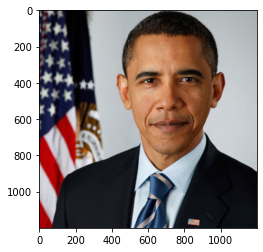

In [ ]:
#Barack
uploaded = files.upload()
image_list_input.append(list(uploaded.keys())[0])
imshow(PIL.Image.open(list(uploaded.keys())[0]))

Saving michelle obama 2.jpeg to michelle obama 2.jpeg


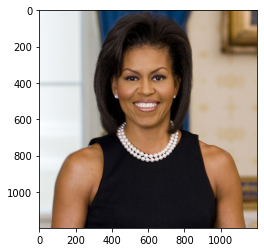

In [ ]:
#Michelle
uploaded = files.upload()
image_list_input.append(list(uploaded.keys())[0])
imshow(PIL.Image.open(list(uploaded.keys())[0]))

Saving malia1.jpeg to malia1.jpeg


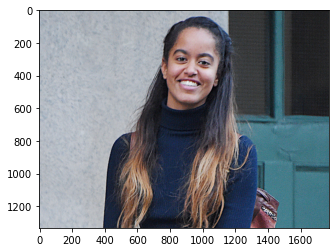

In [ ]:
#Malia
uploaded = files.upload()
image_list_input.append(list(uploaded.keys())[0])
imshow(PIL.Image.open(list(uploaded.keys())[0]))

Saving Sasha obama 3.jpeg to Sasha obama 3.jpeg


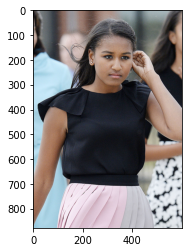

In [ ]:
#Sasha
uploaded = files.upload()
image_list_input.append(list(uploaded.keys())[0])
imshow(PIL.Image.open(list(uploaded.keys())[0]))

In [ ]:
image_list_input

['obama 3.jpeg', 'michelle obama 2.jpeg', 'malia1.jpeg', 'Sasha obama 3.jpeg']

In [ ]:
baseembeddinglist = get_embedding_list(image_list_input)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Who is in the photo?
**Under python backend: classify.html and main.py**<br>

Saving obama_family_speech.jpeg to obama_family_speech.jpeg


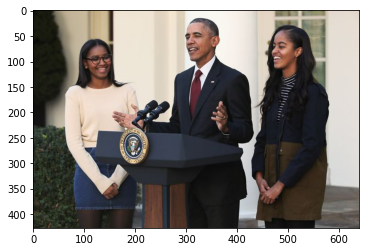

In [ ]:
# New Image
newfaceimage = files.upload()
imshow(PIL.Image.open(list(newfaceimage.keys())[0]))

In [ ]:
prediction = predict(newfaceimage, baseembeddinglist, name_list)
prediction

['Sasha', 'Barack', 'Malia']

Saving obama2.jpeg to obama2.jpeg


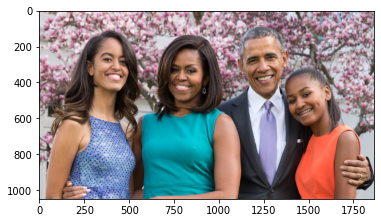

In [ ]:
# New Image
newfaceimage = files.upload()
imshow(PIL.Image.open(list(newfaceimage.keys())[0]))

In [ ]:
prediction = predict(newfaceimage, baseembeddinglist, name_list)
prediction

['Malia', 'Michelle', 'Barack', 'Sasha']

# Save the photo at the folders
**Under python backend: calssify.html and main.py**<br>
This automatically saves the photo into predicted names folder.<br>
For the first photo, this will be saved into 'Sasha' folder, 'Barack' folder, and 'Malia' folder

In [ ]:
import cv2

In [ ]:
# Get all images from directory
import os, os.path

new_image_list = []
new_image_name_list = []

path = "/content/drive/MyDrive/ObamaFamilyImage"
valid_images = [".jpg",".gif",".png",".tga", ".jpeg"]

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    new_image_list.append(os.path.join(path,f))
    new_image_name_list.append(f)

In [ ]:
index = 0
for new_image in new_image_list:
  prediction = predict(new_image, baseembeddinglist, name_list)
  print("Our prediction:", prediction)

  for each_prediction in prediction:
    newpath = "/content/drive/MyDrive/DS440/ObamaFamilyOutput/" + each_prediction + "/"
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    print(new_image)
    new_image2 = Image.open(new_image)
    new_image2.save(newpath + new_image_name_list[index])
  index += 1

Our prediction: ['Malia', 'Michelle', 'Barack', 'Sasha']
/content/drive/MyDrive/ObamaFamilyImage/obama2.jpeg
/content/drive/MyDrive/ObamaFamilyImage/obama2.jpeg
/content/drive/MyDrive/ObamaFamilyImage/obama2.jpeg
/content/drive/MyDrive/ObamaFamilyImage/obama2.jpeg
Our prediction: ['Michelle', 'Malia', 'Barack', 'Sasha']
/content/drive/MyDrive/ObamaFamilyImage/obama3.jpeg
/content/drive/MyDrive/ObamaFamilyImage/obama3.jpeg
/content/drive/MyDrive/ObamaFamilyImage/obama3.jpeg
/content/drive/MyDrive/ObamaFamilyImage/obama3.jpeg
Our prediction: ['Barack']
/content/drive/MyDrive/ObamaFamilyImage/obama4.jpeg
Our prediction: []
Our prediction: ['Sasha']
/content/drive/MyDrive/ObamaFamilyImage/Sasha obama 4.jpeg
Our prediction: ['Sasha']
/content/drive/MyDrive/ObamaFamilyImage/Sasha obama 9.jpeg
Our prediction: ['Sasha']
/content/drive/MyDrive/ObamaFamilyImage/Sasha obama 7.jpeg
Our prediction: ['Sasha']
/content/drive/MyDrive/ObamaFamilyImage/Sasha obama 10.jpeg
Our prediction: ['Sasha']
/cont